In [ ]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read in data files from github
column_desc = pd.read_excel("https://raw.githubusercontent.com/rukky022/AI_HR_Attrition/main/original_data/data_dictionary.xlsx")
# Employee_ID is the index of each file
emp_survey_result = pd.read_csv("https://raw.githubusercontent.com/rukky022/AI_HR_Attrition/main/original_data/employee_survey_data.csv")
emp_data = pd.read_csv("https://raw.githubusercontent.com/rukky022/AI_HR_Attrition/main/original_data/general_data.csv")
emp_survey_manager = pd.read_csv("https://raw.githubusercontent.com/rukky022/AI_HR_Attrition/main/original_data/manager_survey_data.csv")

In [ ]:
# first ten entries of data_dictionary.xlsx
column_desc.head(10)

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


In [ ]:
# first ten entries of employeer_survey_data.csv
emp_survey_result.head(10)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
5,6,3.0,2.0,2.0
6,7,1.0,3.0,1.0
7,8,1.0,2.0,3.0
8,9,2.0,4.0,3.0
9,10,2.0,1.0,3.0


In [ ]:
# first ten entries of general_data.csv
emp_data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [ ]:
# first ten entries of manager_survey_data.csv
emp_survey_manager.head(10)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
5,6,3,3
6,7,3,4
7,8,3,4
8,9,3,4
9,10,3,3


____________________
## Exploring the Data

In [ ]:
# summary of information column_desc
column_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Variable  30 non-null     object
 1   Meaning   30 non-null     object
 2   Levels    29 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [ ]:
# summary of information emp_data
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
# summary of information emp_survey_result
emp_survey_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
# summary of information emp_survey_manager
emp_survey_manager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [ ]:
# check for null values for each dataframe
emp_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
emp_survey_result.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [ ]:
emp_survey_manager.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

In [ ]:
# join the tables on employee_id; df is final dataset -> ruqayyah
inter_df = pd.merge(emp_data, emp_survey_result)
df = pd.merge(inter_df, emp_survey_manager)
df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,28.0,5,7,7,7,3.0,2.0,2.0,3,3
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,10.0,2,0,0,0,1.0,2.0,3.0,3,4
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,10.0,2,9,7,8,2.0,4.0,3.0,3,4
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,6.0,2,6,1,5,2.0,1.0,3.0,3,3


In [ ]:
#total of 28 columns -> ruqayyah
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
# seeing the null values in combined data -> ruqayyah
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [ ]:
#for purpose of making features dataframe describing the characteristics of each column
#rename employeeID to employeeNumber as that's what's in column_desc -> ruqayyah
df.rename(columns={"EmployeeID": "EmployeeNumber"}, inplace=True)
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4


In [ ]:
#feature characteristics -> ruqayyah
desc = {}
# save the mapping of each feature to its description in desc
for i in range(column_desc.shape[0]):
    f = column_desc.iloc[i]
    if f["Variable"] is not np.NaN:
        desc[f["Variable"]] = f["Meaning"]

# build the features dataframe
features = pd.DataFrame(columns=['Feature Name', 'Description', 'Dtype', 'Domain'])
for col in df.columns:
    features.loc[len(features)] = [col, desc[col], df[col].dtype, sorted(df[col].unique())]

features

,Feature Name,Description,Dtype,Domain
0,Age,Age of the employee,int64,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
1,Attrition,Whether the employee left in the previous year...,object,"[No, Yes]"
2,BusinessTravel,How frequently the employees travelled for bus...,object,"[Non-Travel, Travel_Frequently, Travel_Rarely]"
3,Department,Department in company,object,"[Human Resources, Research & Development, Sales]"
4,DistanceFromHome,Distance from home in kms,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
5,Education,Education Level,int64,"[1, 2, 3, 4, 5]"
6,EducationField,Field of education,object,"[Human Resources, Life Sciences, Marketing, Me..."
7,EmployeeCount,Employee count,int64,[1]
8,EmployeeNumber,Employee number/id,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,Gender,Gender of employee,object,"[Female, Male]"


In [ ]:
# there are three columns where the domain of the column is 1 value:
# EmployeeCount, Over18, and StandardHours. That means every row
# in the table has the same value for that column, meaning that
# it's a trivial column that won't have an effect on our models
# so we can drop those columns now:
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4


In [ ]:
# rebuild our features dataframe:
features = pd.DataFrame(columns=['Feature Name', 'Description', 'Dtype', 'Domain'])
for col in df.columns:
    features.loc[len(features)] = [col, desc[col], df[col].dtype, sorted(df[col].unique())]

features

# exported it to manually add continuous or categorical information to each feature
# comp_details = dict(method='zip', archive_name='features.csv')
# features.to_csv('features.zip', index=False, compression=comp_details)

,Feature Name,Description,Dtype,Domain
0,Age,Age of the employee,int64,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
1,Attrition,Whether the employee left in the previous year...,object,"[No, Yes]"
2,BusinessTravel,How frequently the employees travelled for bus...,object,"[Non-Travel, Travel_Frequently, Travel_Rarely]"
3,Department,Department in company,object,"[Human Resources, Research & Development, Sales]"
4,DistanceFromHome,Distance from home in kms,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
5,Education,Education Level,int64,"[1, 2, 3, 4, 5]"
6,EducationField,Field of education,object,"[Human Resources, Life Sciences, Marketing, Me..."
7,EmployeeNumber,Employee number/id,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,Gender,Gender of employee,object,"[Female, Male]"
9,JobLevel,Job level at company on a scale of 1 to 5,int64,"[1, 2, 3, 4, 5]"


In [ ]:
# read in features.csv with updated columns
features = pd.read_csv("https://raw.githubusercontent.com/rukky022/AI_HR_Attrition/main/features.csv", index_col="Feature Name")
features.head(6)
# features  <- uncomment and run this to see the whole list

,Description,Type,Dtype,Categorical Mapping,Domain
Feature Name,,,,,
Age,Age of the employee,continuous,int64,NaN,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
Attrition,Whether the employee left in the previous year...,categorical,object,NaN,"['No', 'Yes']"
BusinessTravel,How frequently the employees travelled for bus...,categorical,object,NaN,"['Non-Travel', 'Travel_Frequently', 'Travel_Ra..."
Department,Department in company,categorical,object,NaN,"['Human Resources', 'Research & Development', ..."
DistanceFromHome,Distance from home in kms,continuous,int64,NaN,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Education,Education Level,categorical,int64,"{1:'Below College', 2: 'College', 3:'Bachelor'...","[1, 2, 3, 4, 5]"


In [ ]:
# rename EmployeeNumber back to EmployeeID
df.rename(columns={"EmployeeNumber": "EmployeeID"}, inplace=True)
features.rename(index={"EmployeeNumber" : "EmployeeID"}, inplace=True)

In [ ]:
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4


In [ ]:
features.head(9)

,Description,Type,Dtype,Categorical Mapping,Domain
Feature Name,,,,,
Age,Age of the employee,continuous,int64,NaN,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
Attrition,Whether the employee left in the previous year...,categorical,object,NaN,"['No', 'Yes']"
BusinessTravel,How frequently the employees travelled for bus...,categorical,object,NaN,"['Non-Travel', 'Travel_Frequently', 'Travel_Ra..."
Department,Department in company,categorical,object,NaN,"['Human Resources', 'Research & Development', ..."
DistanceFromHome,Distance from home in kms,continuous,int64,NaN,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Education,Education Level,categorical,int64,"{1:'Below College', 2: 'College', 3:'Bachelor'...","[1, 2, 3, 4, 5]"
EducationField,Field of education,categorical,object,NaN,"['Human Resources', 'Life Sciences', 'Marketin..."
EmployeeID,Employee number/id,continuous,int64,NaN,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Gender,Gender of employee,categorical,object,NaN,"['Female', 'Male']"


____________________
## Data Quality Report

In [ ]:
# building the data quality reports -> ruqayyah

# Desc. = Description, % of Missing = Percentage of Missing Values
# Card. = Cardinality (number of unique values used), Min. = Minimum Value
# Max. = Maximum Value, Std. Dev. = Standard Deviation,
# Mode Freq. = Mode Frequency, Mode % = Percantage of Entries with that Mode

continuous = pd.DataFrame(columns=['Feature', 'Desc.', 'Count', '% of Missing', 'Card.', 'Min.', 'Q1', 'Median', 'Q3', 'Max.', 'Mean', 'Std. Dev.'])
categorical = pd.DataFrame(columns=['Feature', 'Desc.', 'Count', '% of Missing', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %'])

# for each feature
for f in features.index:
    # if it's continuous, add it to continuous DQR
    if features['Type'][f] == 'continuous':
        if f != "EmployeeID":
            continuous.loc[len(continuous)] = [f, features['Description'][f], df[f].count(), round(((df[f].isnull().sum())/df[f].count()) * 100, 2), df[f].nunique(), min(df[f]), round(df[f].describe()['25%'], 2),
                                          round(df[f].describe()['50%'], 2), round(df[f].describe()['75%'], 2), max(df[f]), round(df[f].describe()['mean'], 2), round(df[f].describe()['std'], 2)]
    # otherwise, it's categorical, so add to categorical DQR
    else:
        categorical.loc[len(categorical)] = [f, features['Description'][f], df[f].count(), round(((df[f].isnull().sum())/df[f].count()) * 100, 2), df[f].nunique(), df[f].value_counts().index[0], 
                                             df[f].value_counts().iloc[0], round((df[f].value_counts().iloc[0] / df[f].count()) * 100, 2), df[f].value_counts().index[1], df[f].value_counts().iloc[1], 
                                             round((df[f].value_counts().iloc[1] / df[f].count()) * 100, 2)]

# set the index as the feature name
continuous = continuous.set_index('Feature')
categorical = categorical.set_index('Feature')

In [ ]:
# continuous data quality report
continuous

,Desc.,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.
Feature,,,,,,,,,,,
Age,Age of the employee,4410,0.00,43,18.0,30.0,36.0,43.0,60.0,36.92,9.13
DistanceFromHome,Distance from home in kms,4410,0.00,29,1.0,2.0,7.0,14.0,29.0,9.19,8.11
MonthlyIncome,Monthly income in rupees per month,4410,0.00,1349,10090.0,29110.0,49190.0,83800.0,199990.0,65029.31,47068.89
NumCompaniesWorked,Total number of companies the employee has wor...,4391,0.43,10,0.0,1.0,2.0,4.0,9.0,2.69,2.50
PercentSalaryHike,Percent salary hike for last year,4410,0.00,15,11.0,12.0,14.0,18.0,25.0,15.21,3.66
TotalWorkingYears,Total number of years the employee has worked ...,4401,0.20,40,0.0,6.0,10.0,15.0,40.0,11.28,7.78
TrainingTimesLastYear,Number of times training was conducted for thi...,4410,0.00,7,0.0,2.0,3.0,3.0,6.0,2.80,1.29
YearsAtCompany,Total number of years spent at the company by ...,4410,0.00,37,0.0,3.0,5.0,9.0,40.0,7.01,6.13
YearsSinceLastPromotion,Number of years since last promotion,4410,0.00,16,0.0,0.0,1.0,3.0,15.0,2.19,3.22


In [ ]:
# categorical data quality report
categorical

,Desc.,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
Feature,,,,,,,,,,
Attrition,Whether the employee left in the previous year...,4410,0.00,2,No,3699,83.88,Yes,711,16.12
BusinessTravel,How frequently the employees travelled for bus...,4410,0.00,3,Travel_Rarely,3129,70.95,Travel_Frequently,831,18.84
Department,Department in company,4410,0.00,3,Research & Development,2883,65.37,Sales,1338,30.34
Education,Education Level,4410,0.00,5,3,1716,38.91,4,1194,27.07
EducationField,Field of education,4410,0.00,6,Life Sciences,1818,41.22,Medical,1392,31.56
Gender,Gender of employee,4410,0.00,2,Male,2646,60.00,Female,1764,40.00
JobLevel,Job level at company on a scale of 1 to 5,4410,0.00,5,1,1629,36.94,2,1602,36.33
JobRole,Name of job role in company,4410,0.00,9,Sales Executive,978,22.18,Research Scientist,876,19.86
MaritalStatus,Marital status of the employee,4410,0.00,3,Married,2019,45.78,Single,1410,31.97


Notes:
- final combined dataset is `df`
- features with labeled continuous vs categorical is `features`


_______________________________
## Visualize Data

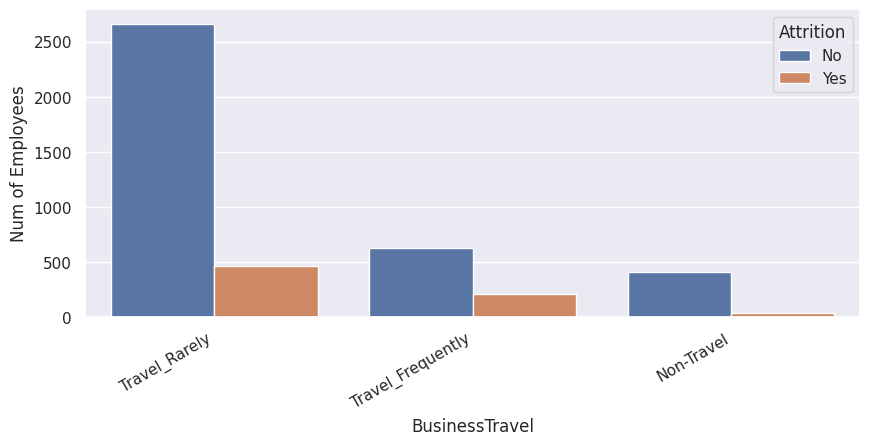

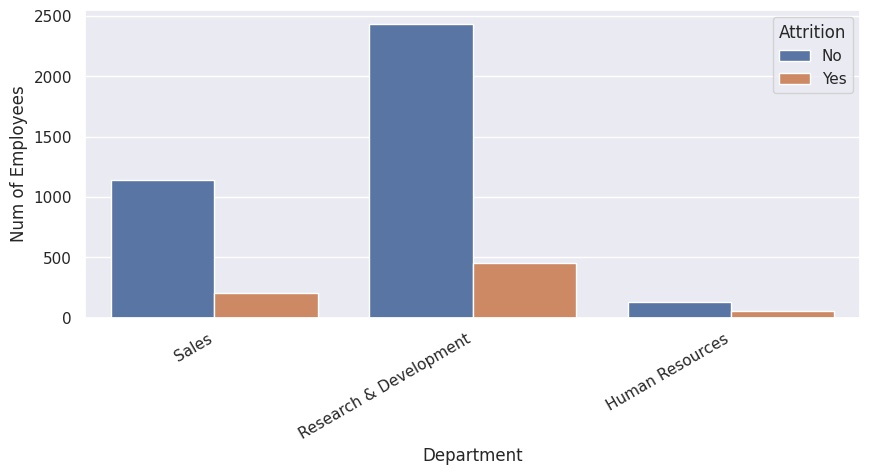

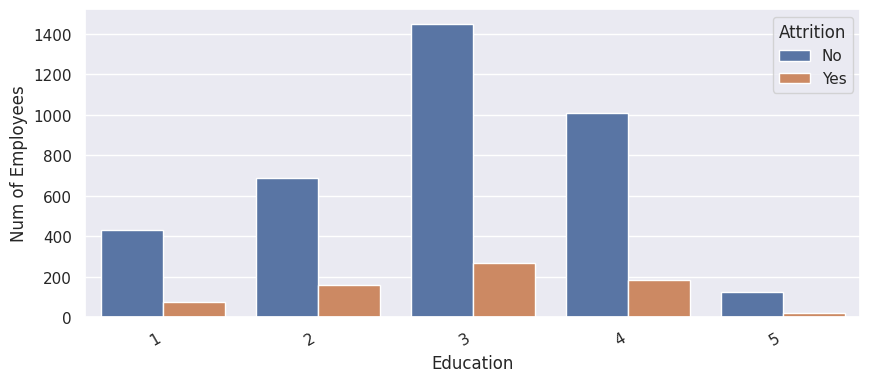

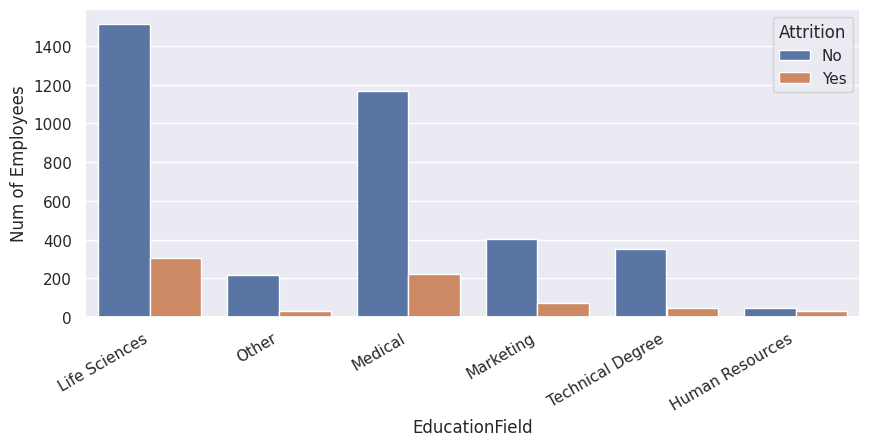

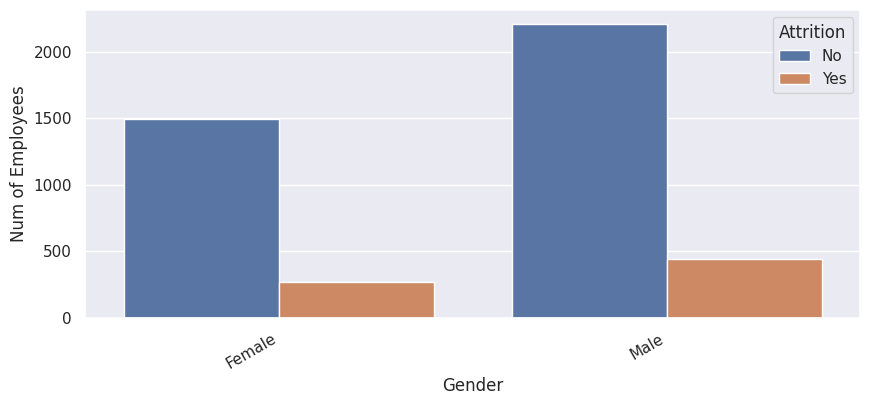

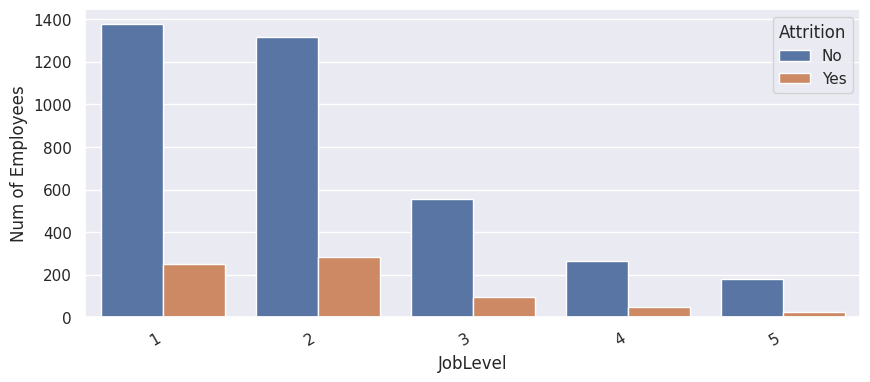

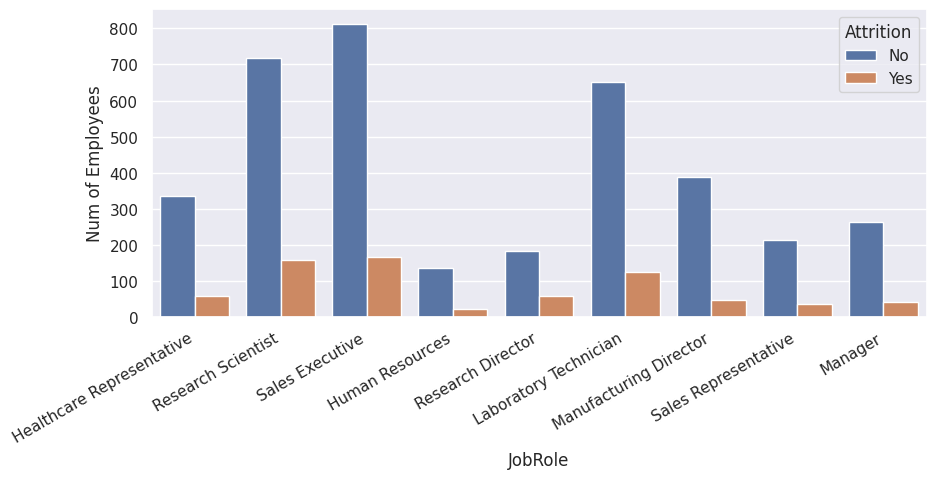

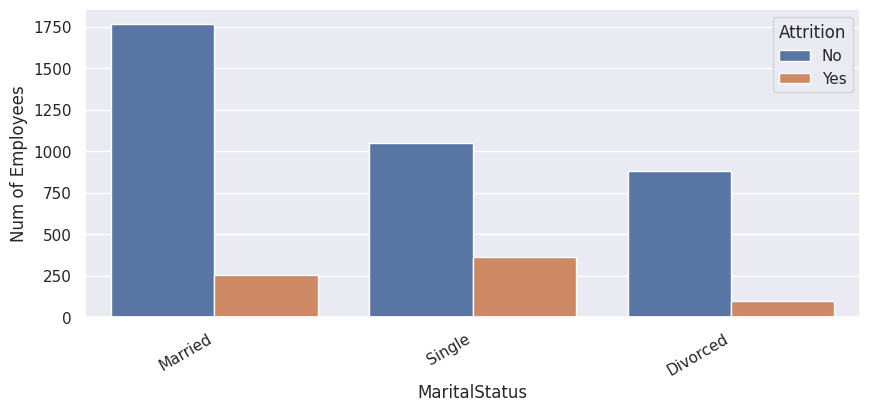

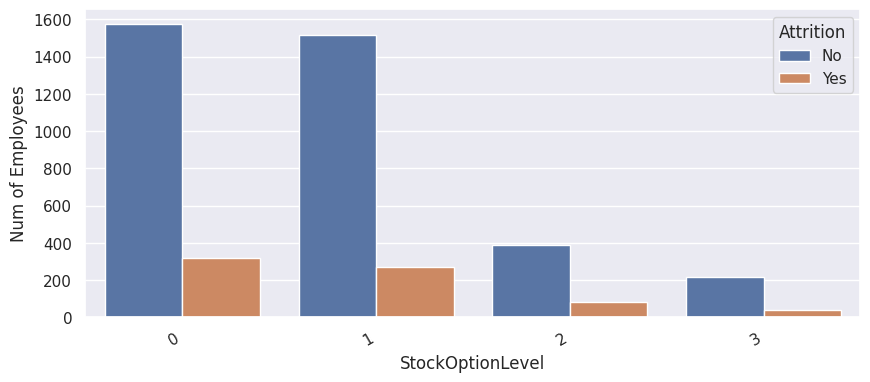

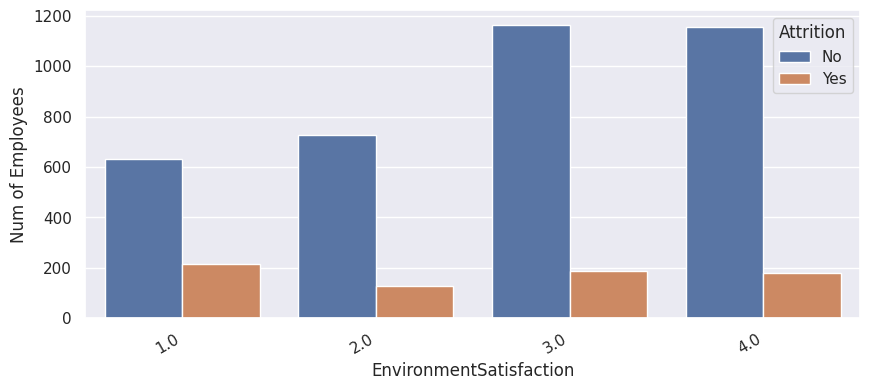

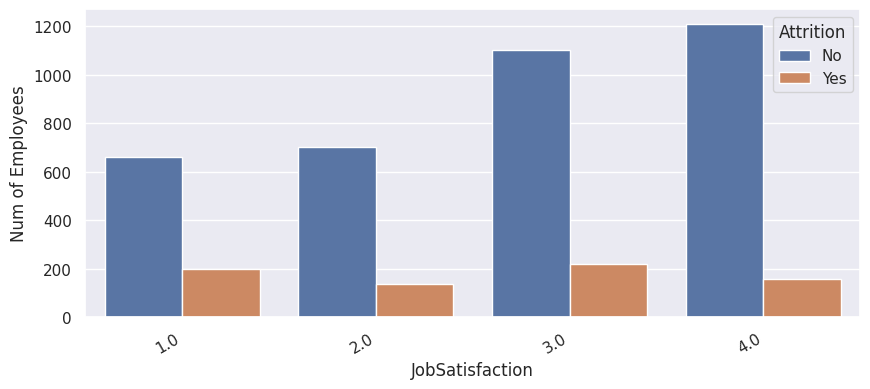

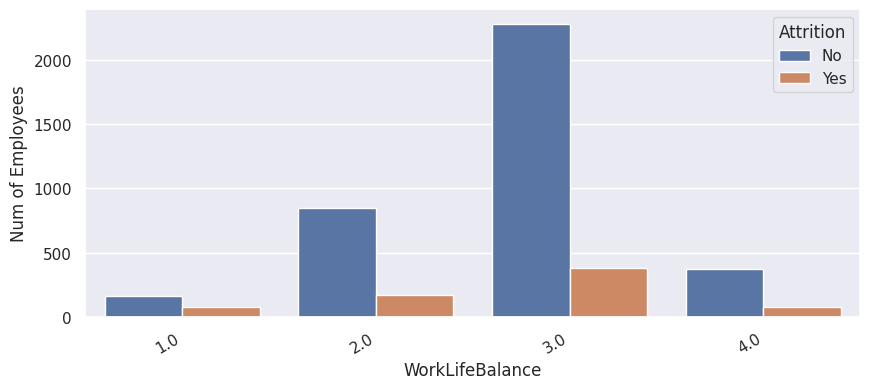

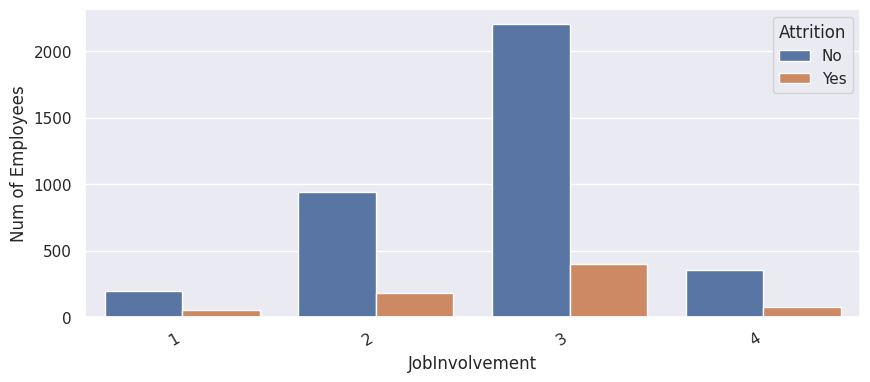

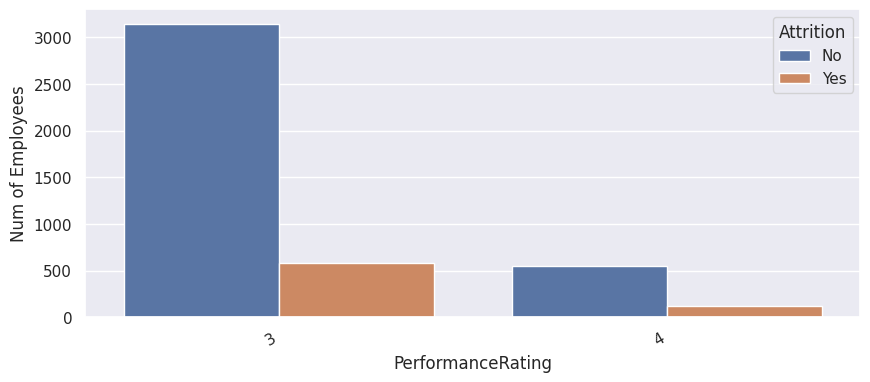

In [ ]:
# visualize categorical features -> lorena
import matplotlib.pyplot as plt
import seaborn as sns
categorical_features = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'] 
continuous_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

sns.set(rc={'figure.figsize':(10,4)})
for feature in categorical_features:
  ax = sns.countplot(x=df[feature], hue=df['Attrition'])
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
  plt.ylabel('Num of Employees')
  plt.show()

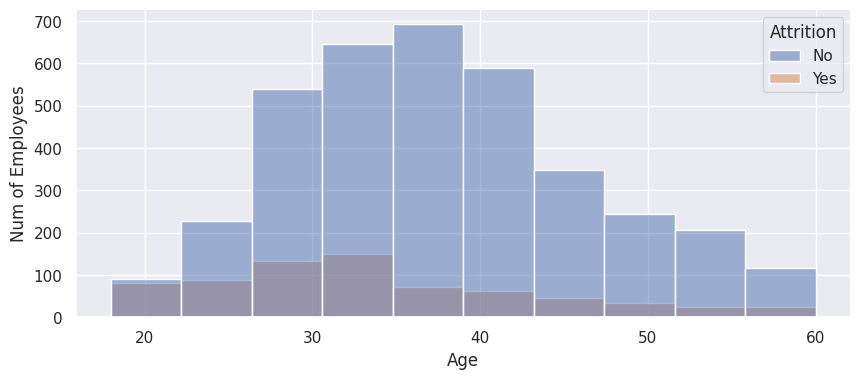

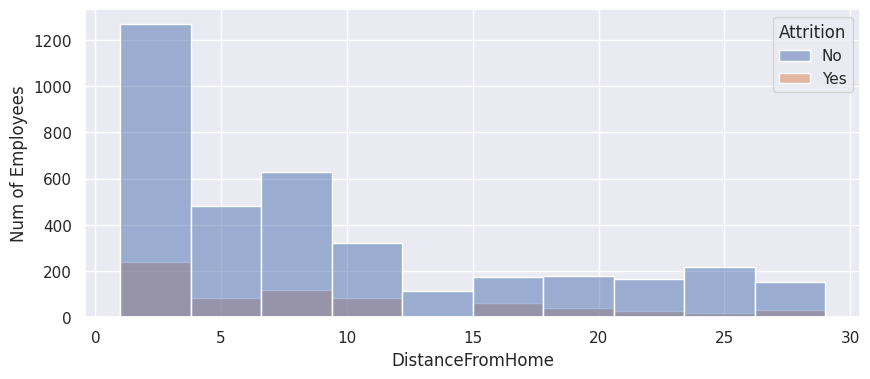

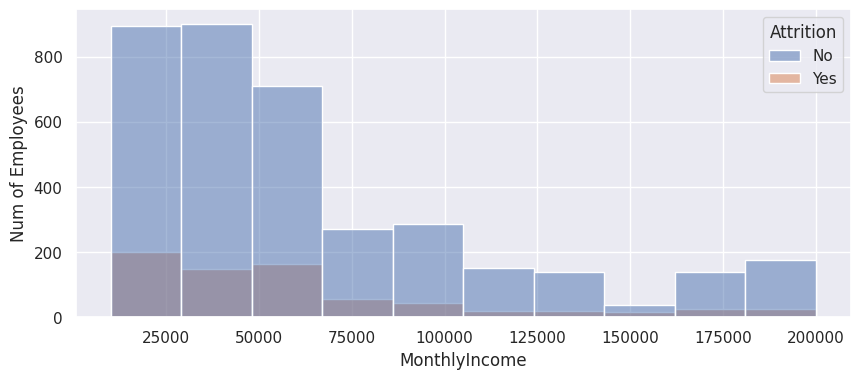

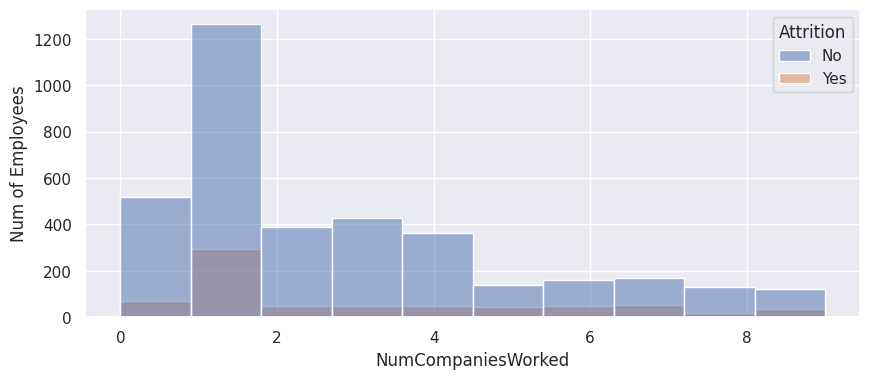

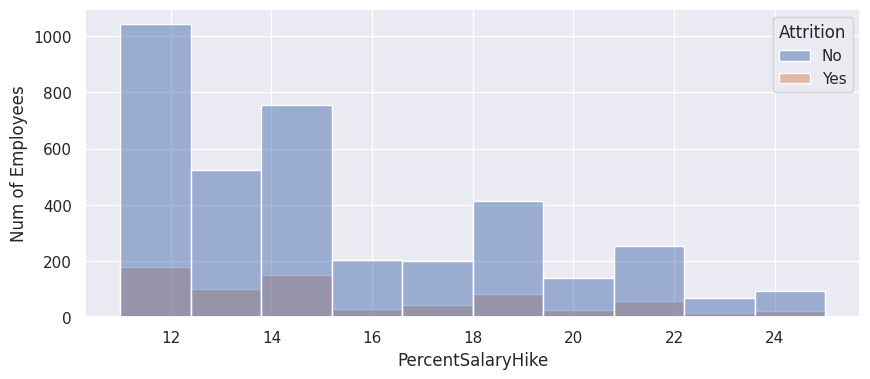

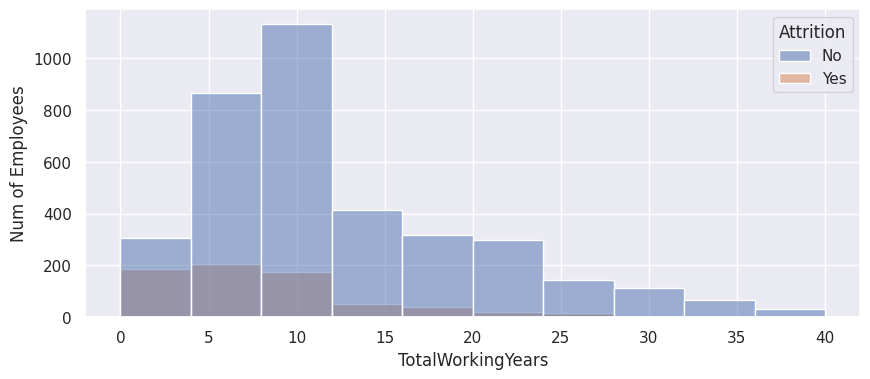

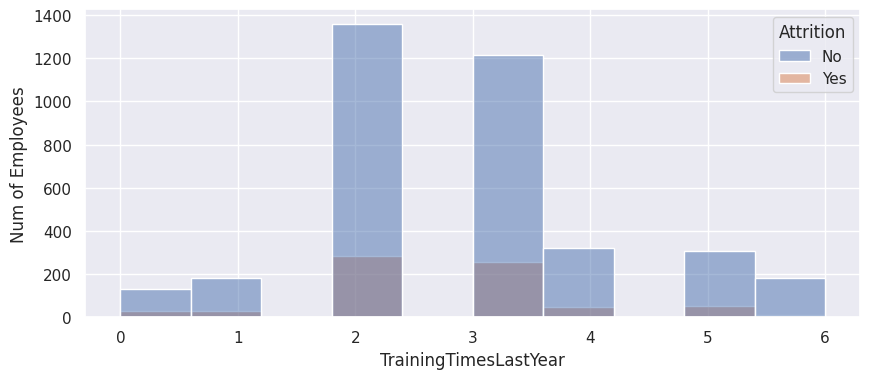

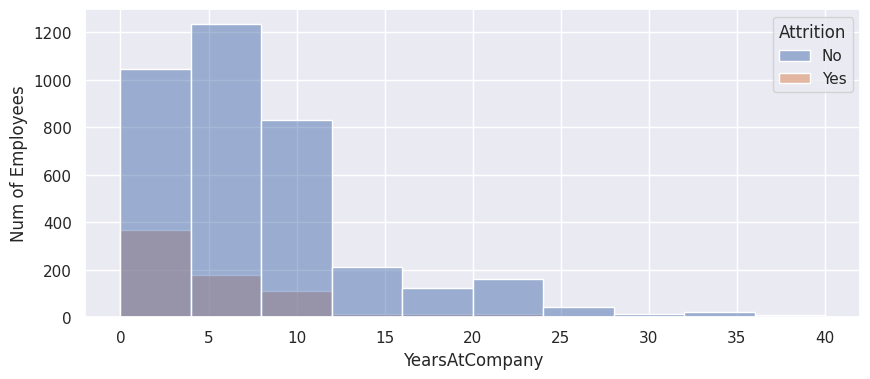

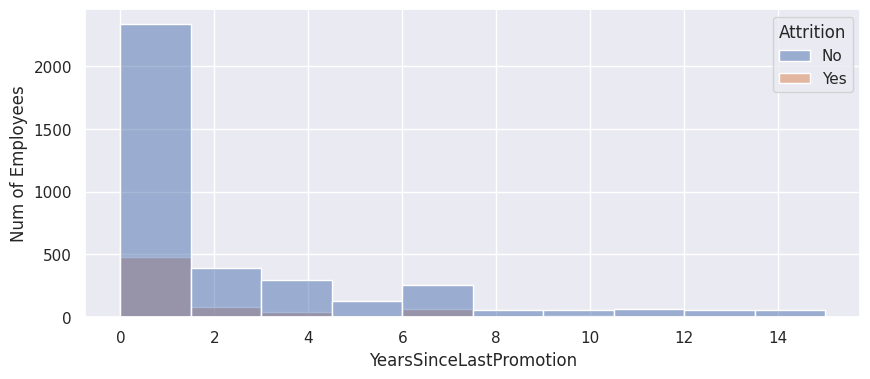

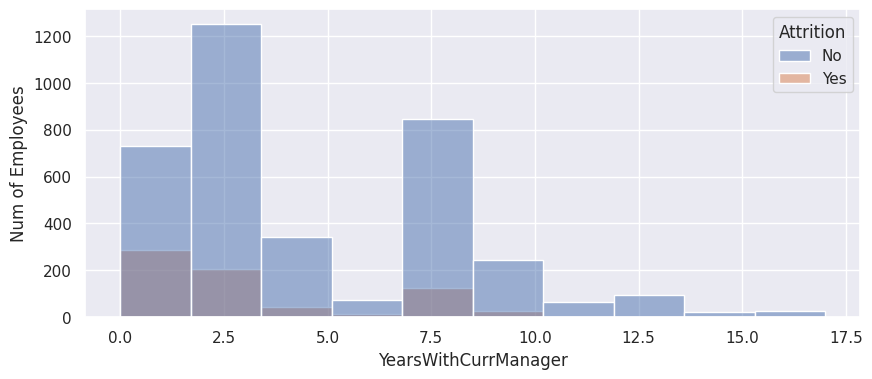

In [ ]:
# visualize continuous features -> lorena
# sns.set(rc={'figure.figsize':(5,4)})
sns.set(rc={'figure.figsize':(10,4)})
for feature in continuous_features:
  sns.histplot(data=df, x=feature, hue='Attrition', bins=10)
  plt.ylabel('Num of Employees')
  plt.show()

## Handle Outliers

In [ ]:
# handle outliers -> lorena

# I will use the inter-quartile range to determine my outliers.
# This methods is used to clamp the outliers to the upper/lower bound. 

df_outlier = df.copy()

for feature in continuous_features:
  Q1, Q2, Q3 = np.nanpercentile(np.array(df_outlier[feature]), [25, 50, 75])
  IQR = Q3 - Q1
  upper_limit = int(IQR * 1.5 + Q3)
  lower_limit = int(Q1 - IQR * 1.5)
  if lower_limit < 1 and feature != 'Age': 
    lower_limit = 0
  elif feature == 'Age':
    lower_limit = 18
  df_outlier[feature] = df_outlier[feature].apply(lambda val: upper_limit if val > upper_limit else (lower_limit if val < lower_limit else val))
  print('{: <30} upper limit: {: >10} \t lower limit: {: >10}'.format(feature, upper_limit, lower_limit))

# My opinions: the majority of our instances have no missing values. As such this is more a precaution to future data.
# Using the interquartile range is great for handling extreme outliers and as such will 
# make the outliers sway the predictions less.

Age                            upper limit:         62 	 lower limit:         18
DistanceFromHome               upper limit:         32 	 lower limit:          0
MonthlyIncome                  upper limit:     165835 	 lower limit:          0
NumCompaniesWorked             upper limit:          8 	 lower limit:          0
PercentSalaryHike              upper limit:         27 	 lower limit:          3
TotalWorkingYears              upper limit:         28 	 lower limit:          0
TrainingTimesLastYear          upper limit:          4 	 lower limit:          0
YearsAtCompany                 upper limit:         18 	 lower limit:          0
YearsSinceLastPromotion        upper limit:          7 	 lower limit:          0
YearsWithCurrManager           upper limit:         14 	 lower limit:          0


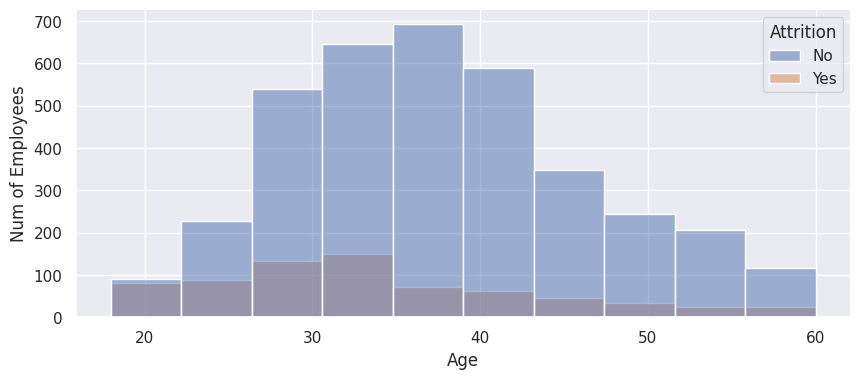

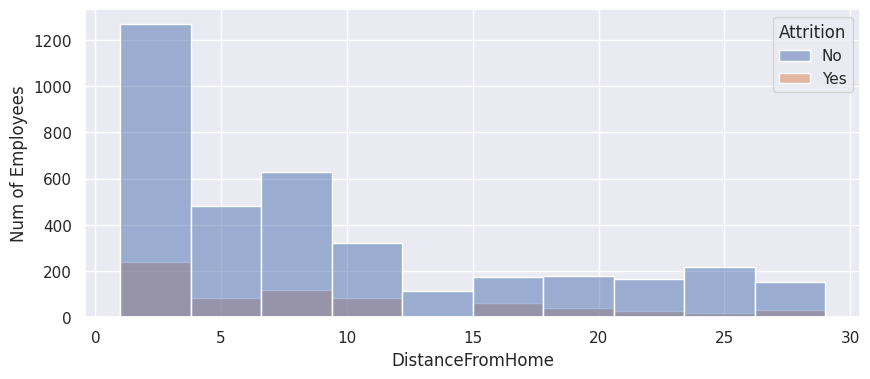

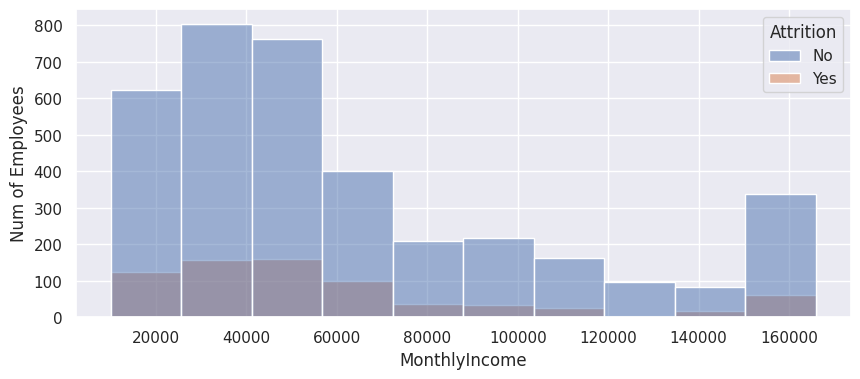

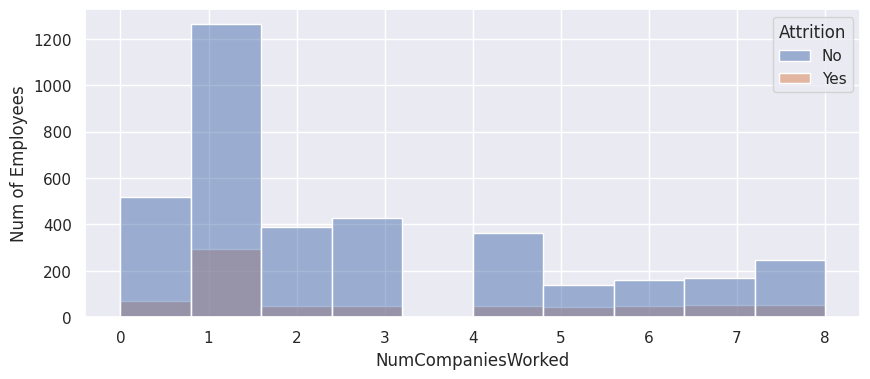

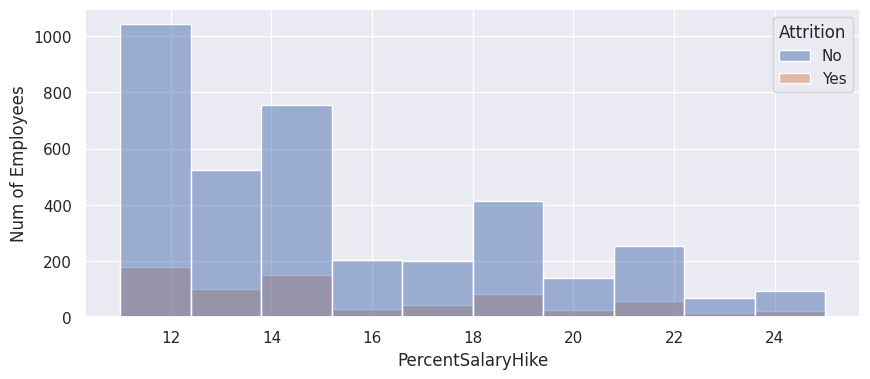

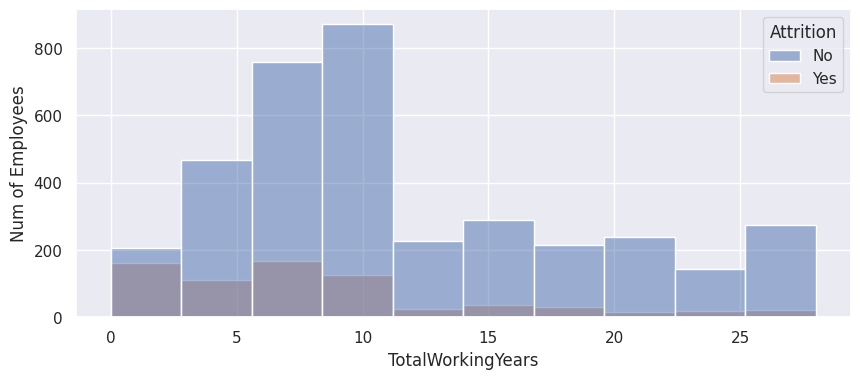

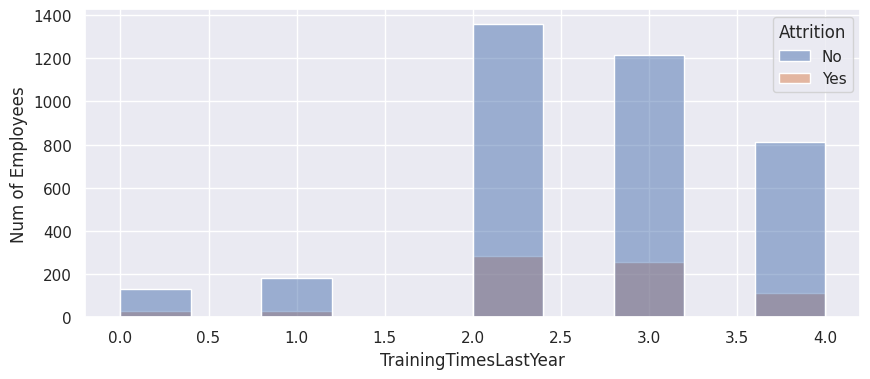

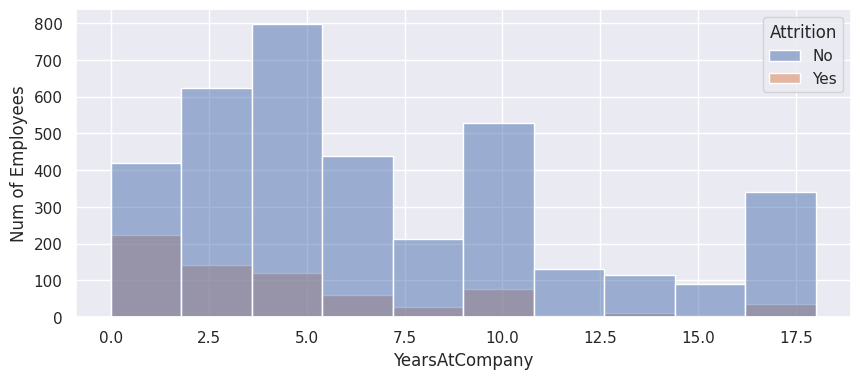

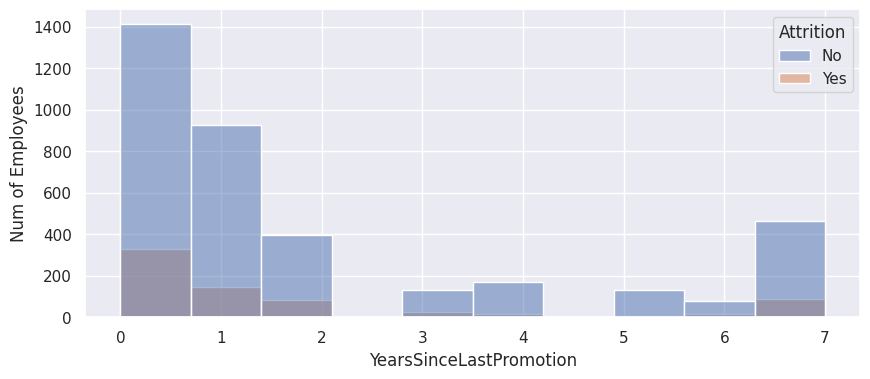

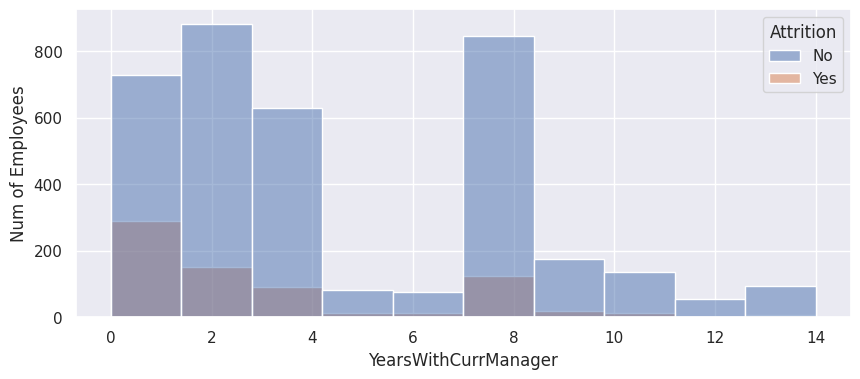

In [ ]:
# visualize data without outliers -> lorena

# I will use seaborn to visualize each continuous feature after the outliers were clamped.
# It is very likely that we dont have any changes, because the current dataset is very clean.
# However, here we would generally see a shift in the graph to tighten everything up.


# NOTICE: there is no real change to the data, because our cleaned data did not have any outliers.
for feature in continuous_features:
  sns.histplot(data=df_outlier, x=feature, hue='Attrition', bins=10)
  plt.ylabel('Num of Employees')
  plt.show()

In [39]:
# fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,12))
# a = [ax for ax in axes.flat] # separate the subplots

# contin = continuous.index
# # plot and title each one
# for i in range(len(contin)):
#     sns.boxplot(data=df[contin], x=contin[i], fliersize=15, ax=a[i])
#     a[i].set_title(contin[i], fontsize = 12)
# fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,12))
# a = [ax for ax in axes.flat] # separate the subplots

# contin = continuous.index
# # plot and title each one
# for i in range(len(contin)):
#     sns.boxplot(data=df_outlier[contin], x=contin[i], fliersize=15, ax=a[i])
#     a[i].set_title(contin[i], fontsize = 12)

## Normalize Data

In [ ]:
# normalize continuous features -> ruqayyah
# range normalization for continuous data features

# set range
low, high = 0, 1

# copy outlier free dataset
df_range = df_outlier.copy()

# for each continuous feature
for feature in continuous.index:
    # find the maximum and minimum value
    maxC, minC = max(df_range[feature]), min(df_range[feature])
    # normalize each value in the feature
    for i in range(df_range.loc[:,feature].size):
        df_range.loc[i, feature] = (((df_range.loc[i, feature]-minC)/(maxC-minC))*(high-low))+low

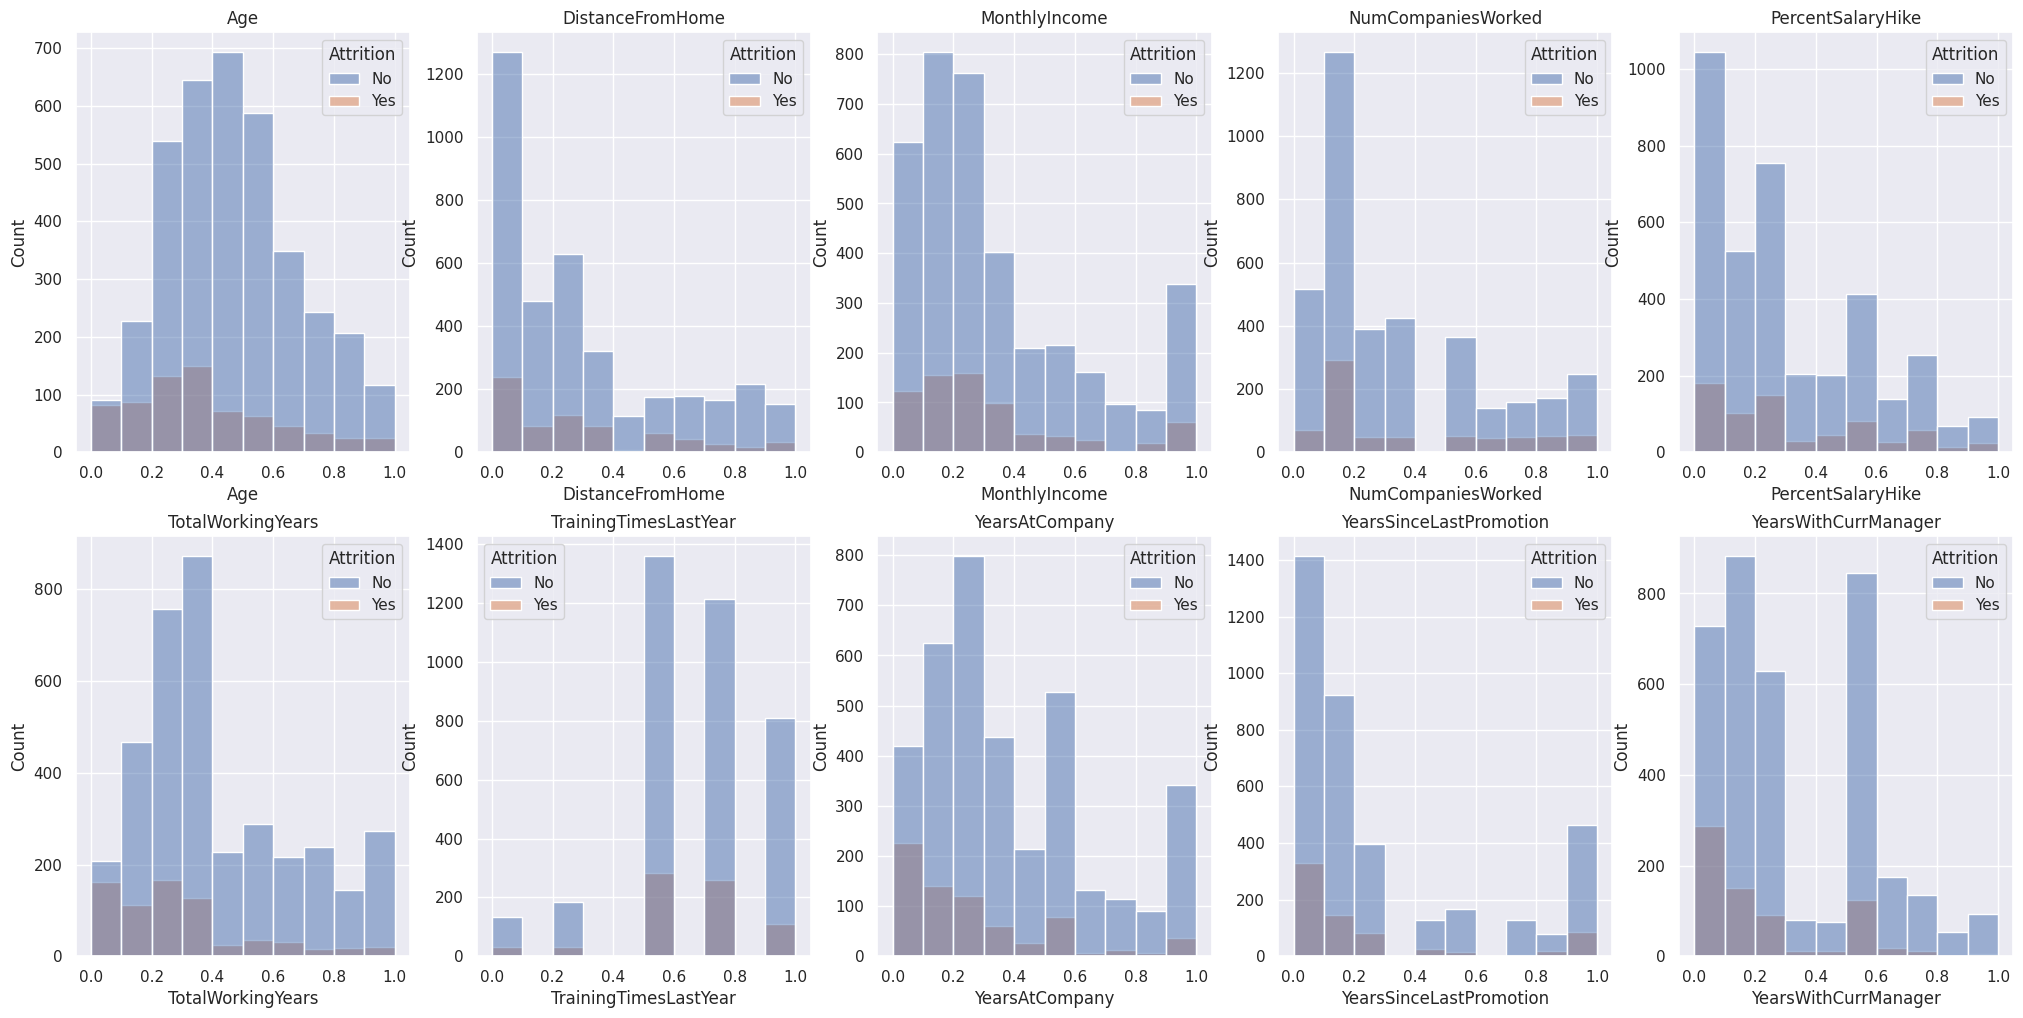

In [ ]:
# visualize normalized data -> ruqayyah
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(25,12))
a = [ax for ax in axes.flat] # separate the subplots

contin = continuous.index
# plot and title each one
for i in range(len(contin)):
    sns.histplot(data=df_range, x=contin[i], hue='Attrition', bins=10, ax=a[i])
    a[i].set_title(contin[i], fontsize = 12)

_____________________
## Processed Data

In [ ]:
# display cleaned and normalized dataset 
cleaned_df = df_range.copy()
cleaned_df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0.785714,No,Travel_Rarely,Sales,0.178571,2,Life Sciences,1,Female,1,...,0.035714,1.00,0.055556,0.000000,0.000000,3.0,4.0,2.0,3,3
1,0.309524,Yes,Travel_Frequently,Research & Development,0.321429,1,Life Sciences,2,Female,1,...,0.214286,0.75,0.277778,0.142857,0.285714,3.0,2.0,4.0,2,4
2,0.333333,No,Travel_Frequently,Research & Development,0.571429,4,Other,3,Male,4,...,0.178571,0.50,0.277778,0.000000,0.214286,2.0,2.0,1.0,3,3
3,0.476190,No,Non-Travel,Research & Development,0.035714,5,Life Sciences,4,Male,3,...,0.464286,1.00,0.444444,1.000000,0.357143,4.0,4.0,3.0,2,3
4,0.333333,No,Travel_Rarely,Research & Development,0.321429,1,Medical,5,Male,1,...,0.321429,0.50,0.333333,0.000000,0.285714,4.0,1.0,3.0,3,3
5,0.666667,No,Travel_Rarely,Research & Development,0.250000,3,Life Sciences,6,Female,4,...,1.000000,1.00,0.388889,1.000000,0.500000,3.0,2.0,2.0,3,3
6,0.238095,Yes,Travel_Rarely,Research & Development,0.357143,2,Medical,7,Male,2,...,0.178571,0.50,0.000000,0.000000,0.000000,1.0,3.0,1.0,3,4
7,0.261905,No,Travel_Rarely,Research & Development,0.607143,3,Life Sciences,8,Male,2,...,0.357143,0.50,0.000000,0.000000,0.000000,1.0,2.0,3.0,3,4
8,0.309524,No,Travel_Rarely,Research & Development,0.000000,3,Life Sciences,9,Male,3,...,0.357143,0.50,0.500000,1.000000,0.571429,2.0,4.0,3.0,3,4
9,0.166667,No,Non-Travel,Research & Development,0.214286,4,Medical,10,Female,4,...,0.214286,0.50,0.333333,0.142857,0.357143,2.0,1.0,3.0,3,3


In [ ]:
# apply one hot encoding for categorical features
hot_encoded_df = pd.get_dummies(data = cleaned_df, columns=['BusinessTravel', 'Department','EducationField','Gender','JobRole','MaritalStatus'])
# display first 6 rows
hot_encoded_df.head(6)

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.785714,No,0.178571,2,1,1,0.777360,0.125,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
1,0.309524,Yes,0.321429,1,2,1,0.204180,0.000,0.857143,1,...,0,0,0,0,1,0,0,0,0,1
2,0.333333,No,0.571429,4,3,4,1.000000,0.125,0.285714,3,...,0,0,0,0,0,1,0,0,1,0
3,0.476190,No,0.035714,5,4,3,0.469485,0.375,0.000000,3,...,0,0,0,0,0,0,0,0,1,0
4,0.333333,No,0.321429,1,5,1,0.085589,0.500,0.071429,2,...,0,0,0,0,0,1,0,0,0,1
5,0.666667,No,0.250000,3,6,4,0.196603,0.375,0.142857,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# export final processed data (and upload to github)
# start new colab notebook as this is getting long: https://colab.research.google.com/drive/1e2PSB5XlvK7FHbkdt4FHj7RFnwmg8VTN?usp=sharing

comp_details = dict(method='zip', archive_name='attrition_processed_encoded.csv')
hot_encoded_df.to_csv('attrition_processed_encoded.zip', index=True, compression=comp_details)